In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/CO2_data.csv")
df.head(5)
df.describe()
df.count()

T [C]              72
P_vap [kPa]        72
H_vap [J/g]        57
rho_vap [g/cm3]    57
rho_liq [g/cm3]    72
dtype: int64

In [3]:

df = df[(df['H_vap [J/g]'].notna() & df['rho_vap [g/cm3]'].notna())]
df.count()

T [C]              57
P_vap [kPa]        57
H_vap [J/g]        57
rho_vap [g/cm3]    57
rho_liq [g/cm3]    57
dtype: int64

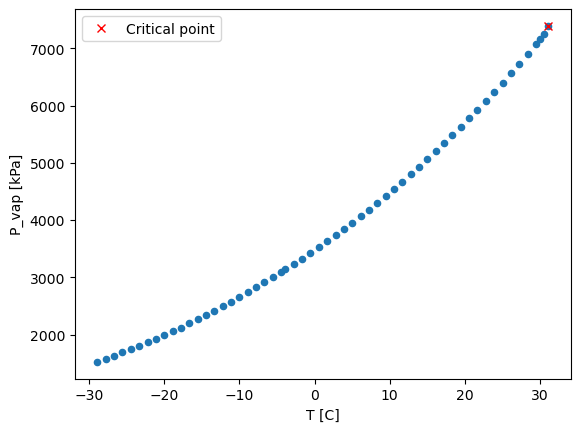

In [4]:
df.plot.scatter(x='T [C]', y='P_vap [kPa]')
T_critical = df[df['H_vap [J/g]'] == 0]['T [C]'].values
P_critical = df[df['H_vap [J/g]'] == 0]['P_vap [kPa]'].values

plt.plot(T_critical, P_critical, 'rx', label='Critical point')
plt.legend()

<Axes: xlabel='T [C]', ylabel='H_vap [J/g]'>

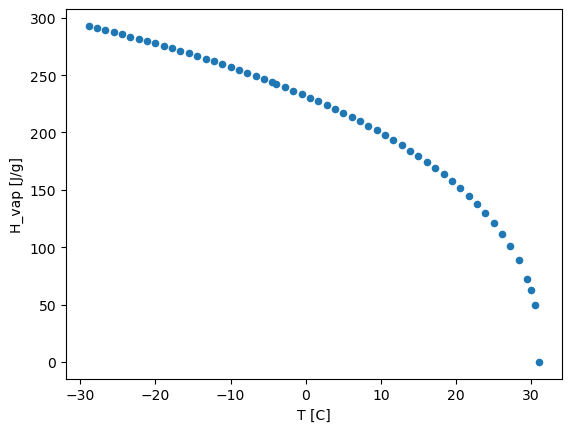

In [5]:
df.plot.scatter("T [C]", "H_vap [J/g]")

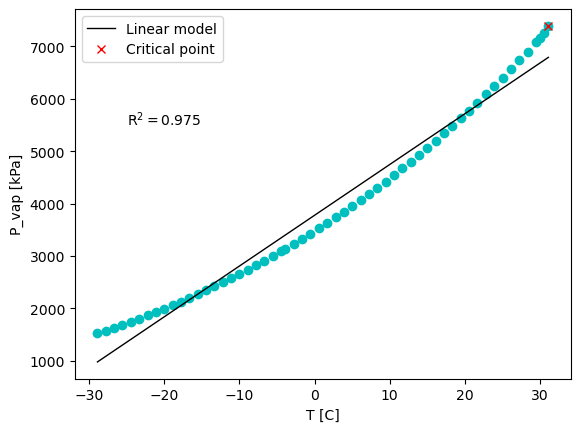

In [6]:
from sklearn.linear_model import LinearRegression

Ts = df['T [C]'].to_numpy().reshape(-1,1)
Ps = df['P_vap [kPa]'].to_numpy().reshape(-1,1)

linear_regression = LinearRegression().fit(Ts, Ps)

x_pred = np.linspace(min(Ts), max(Ts), 100)
y_pred = linear_regression.predict(x_pred)
R2 = linear_regression.score(Ts, Ps)

plt.figure()
plt.plot(Ts, Ps, 'co')
plt.plot(x_pred, y_pred,'k', linewidth=1, label='Linear model')
plt.plot(T_critical, P_critical, 'rx', label='Critical point')
plt.text(-25, 5500, 'R$^2 = $' + str(np.round(R2, 3)))
plt.xlabel('T [C]')
plt.ylabel('P_vap [kPa]')
plt.legend()


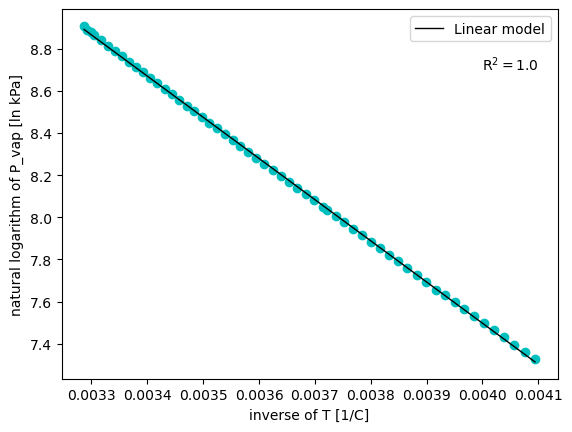

In [7]:
ln_P = np.log(Ps)
inv_T = 1/(Ts + 273.15)

linear_regression = LinearRegression().fit(inv_T, ln_P)

x_pred = np.linspace(min(inv_T), max(inv_T), 100)
y_pred = linear_regression.predict(x_pred)
R2 = linear_regression.score(inv_T, ln_P)


plt.figure()
plt.plot(inv_T, ln_P, 'co')
plt.plot(x_pred, y_pred,'k', linewidth=1, label='Linear model')
plt.text(0.004, 8.7, 'R$^2 = $' + str(np.round(R2, 3)))
plt.xlabel('inverse of T [1/C]')
plt.ylabel('natural logarithm of P_vap [ln kPa]')
plt.legend()

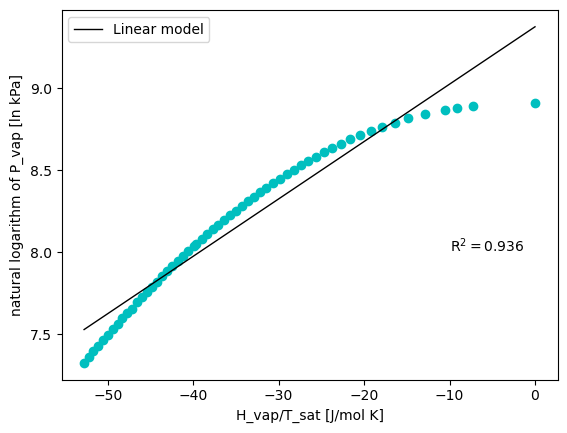

In [8]:
Hvaps = df['H_vap [J/g]'].to_numpy().reshape(-1,1)

# Change units of Hvap
mw_CO2 = 44.01 # g/mol
Hvaps = Hvaps * mw_CO2

ln_P = np.log(Ps)
neg_hvap_T = - Hvaps/(Ts + 273.15)

linear_regression = LinearRegression().fit(neg_hvap_T, ln_P)

x_pred = np.linspace(min(neg_hvap_T), max(neg_hvap_T), 100)
y_pred = linear_regression.predict(x_pred)
R2 = linear_regression.score(neg_hvap_T, ln_P)


plt.figure()
plt.plot(neg_hvap_T, ln_P, 'co')
plt.plot(x_pred, y_pred,'k', linewidth=1, label='Linear model')
plt.text(-10, 8, 'R$^2 = $' + str(np.round(R2, 3)))
plt.xlabel('H_vap/T_sat [J/mol K]')
plt.ylabel('natural logarithm of P_vap [ln kPa]')
plt.legend()

In [9]:
df1 = pd.read_csv("https://raw.githubusercontent.com/edgarsmdn/MLCE_book/main/references/Vapor_pressures.csv")
df1

,Name,CAS-RN,Formula,SMILES,T,Pvap,KDB_ID,Class,Subclass
0,METHANE,74-82-8,CH4,C,90.670000,11.702099,1,Paraffinic Hydrocarbons,n-Alkanes
1,METHANE,74-82-8,CH4,C,94.115172,17.886999,1,Paraffinic Hydrocarbons,n-Alkanes
2,METHANE,74-82-8,CH4,C,97.560345,26.489535,1,Paraffinic Hydrocarbons,n-Alkanes
3,METHANE,74-82-8,CH4,C,101.005517,38.137051,1,Paraffinic Hydrocarbons,n-Alkanes
4,METHANE,74-82-8,CH4,C,104.450690,53.534190,1,Paraffinic Hydrocarbons,n-Alkanes
...,...,...,...,...,...,...,...,...,...
41725,CARBON DIOXIDE,124-38-9,CO2,O=C=O,283.460345,4608.406560,1943,Inorganics,Inorganics
41726,CARBON DIOXIDE,124-38-9,CO2,O=C=O,288.632759,5151.958716,1943,Inorganics,Inorganics
41727,CARBON DIOXIDE,124-38-9,CO2,O=C=O,293.805172,5724.036485,1943,Inorganics,Inorganics
41728,CARBON DIOXIDE,124-38-9,CO2,O=C=O,298.977586,6323.800396,1943,Inorganics,Inorganics


In [10]:
pip install datamol

Note: you may need to restart the kernel to use updated packages.


In [11]:
pip install rdkit

Note: you may need to restart the kernel to use updated packages.


In [14]:

import datamol as dm
def get_fp(mol, fp_type='topological'):
    return dm.to_fp(mol, fp_type=fp_type)

df1['Mol'] = df1['SMILES'].apply(dm.to_mol)
df1['Fingerprint'] = df1['Mol'].apply(get_fp)

[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not removing hydrogen atom without neighbors
[07:28:12] WARNING: not r

In [15]:
dm.list_supported_fingerprints()


{'maccs': <function rdkit.Chem.rdMolDescriptors.GetMACCSKeysFingerprint>,
 'pattern': <function rdkit.Chem.rdmolops.PatternFingerprint>,
 'layered': <function rdkit.Chem.rdmolops.LayeredFingerprint>,
 'erg': <function rdkit.Chem.rdReducedGraphs.GetErGFingerprint>,
 'estate': <function datamol.fp.<lambda>(x, **args)>,
 'avalon-count': <function rdkit.Avalon.pyAvalonTools.GetAvalonCountFP>,
 'ecfp': <function rdkit.Chem.rdFingerprintGenerator.GetMorganGenerator>,
 'fcfp': <function rdkit.Chem.rdFingerprintGenerator.GetMorganGenerator>,
 'topological': <function rdkit.Chem.rdFingerprintGenerator.GetTopologicalTorsionGenerator>,
 'atompair': <function rdkit.Chem.rdFingerprintGenerator.GetAtomPairGenerator>,
 'rdkit': <function rdkit.Chem.rdFingerprintGenerator.GetRDKitFPGenerator>,
 'ecfp-count': <function rdkit.Chem.rdFingerprintGenerator.GetMorganGenerator>,
 'fcfp-count': <function rdkit.Chem.rdFingerprintGenerator.GetMorganGenerator>,
 'topological-count': <function rdkit.Chem.rdFinger

In [16]:
df1["Name"].nunique()

1391

In [17]:
df1["Class"].nunique()

17

In [19]:
df1["Subclass"].nunique()

53

Text(0.5, 9.444444444444459, 'Temperature [K]')

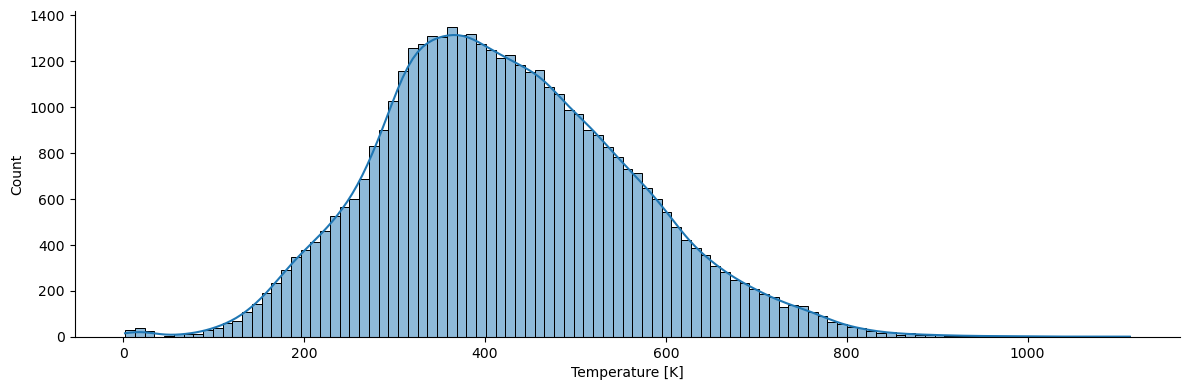

In [21]:
import seaborn as sns

sns.displot(df1, kde=True, x='T', legend=True, height=4, aspect=3)
plt.xlabel('Temperature [K]')

Text(0.5, 9.444444444444459, 'Vapor Pressure [kPa]')

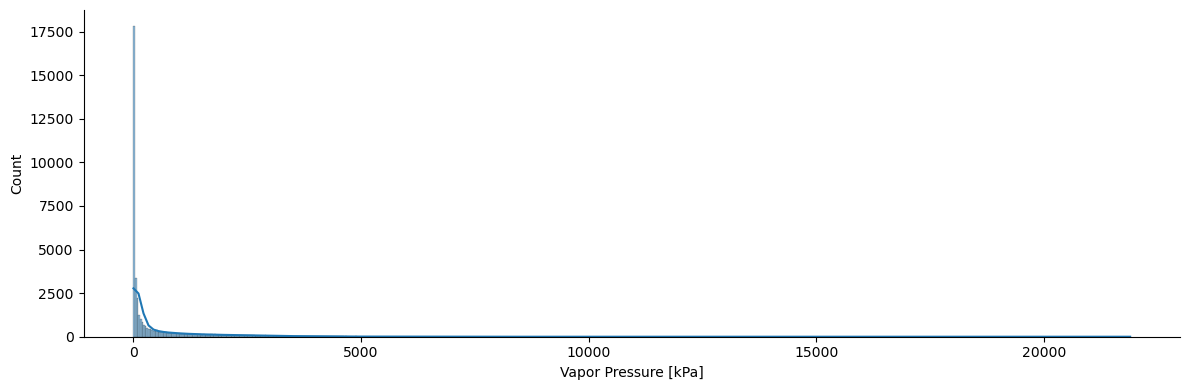

In [23]:
sns.displot(df1, kde=True, x='Pvap', legend=True, height=4, aspect=3)
plt.xlabel('Vapor Pressure [kPa]')

Text(0.5, 9.444444444444459, 'ln Pvap')

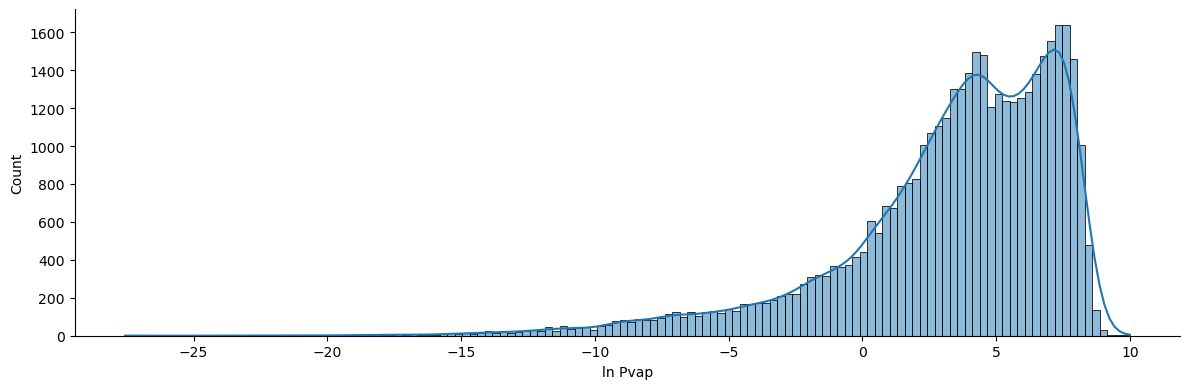

In [24]:
df1['ln_P'] = np.log(df1['Pvap'])
sns.displot(df1, kde=True, x='ln_P', legend=True, height=4, aspect=3)
plt.xlabel('ln Pvap')

In [25]:
df1.count()

Name           41730
CAS-RN         40170
Formula        41730
SMILES         41730
T              41730
Pvap           41730
KDB_ID         41730
Class          41730
Subclass       41730
Mol            41730
Fingerprint    41730
ln_P           41730
dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

chemical_classes = df1['Class'].unique()

train_comps, valid_comps, test_comps = [], [], []
for cl in chemical_classes:
    # Get the data with this class
    df1_cl = df1[df1['Class'] == cl]
    
    # Get unique compounds for this class
    unique_compounds_cl = df1_cl['Name'].unique()
    
    # Randomly split the compounds for train and test
    comp_train_all, comp_test = train_test_split(unique_compounds_cl, test_size=0.2, random_state=0)
    comp_train, comp_valid = train_test_split(comp_train_all, test_size=0.2, random_state=1)
    
    train_comps.extend(list(comp_train))
    valid_comps.extend(list(comp_valid))
    test_comps.extend(list(comp_test))

In [30]:
df1_train = df1[df1['Name'].isin(train_comps)].reset_index()
df1_valid = df1[df1['Name'].isin(valid_comps)].reset_index()
df1_test = df1[df1['Name'].isin(test_comps)].reset_index()

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df1_train['T'].to_numpy().reshape(-1,1))

df1_train['T_scaled'] = scaler.transform(df1_train['T'].to_numpy().reshape(-1,1))
df1_valid['T_scaled'] = scaler.transform(df1_valid['T'].to_numpy().reshape(-1,1))
df1_test['T_scaled'] = scaler.transform(df1_test['T'].to_numpy().reshape(-1,1))

In [33]:
X_train = np.vstack(df1_train['Fingerprint'].tolist()) # Fingerprints to Matrix
Ts_train = df1_train['T_scaled'].to_numpy().reshape(-1,1)
X_train = np.hstack((X_train, Ts_train)) # Concatenate the temperature as part of the input matrix
y_train = df1_train['ln_P'].to_numpy().reshape(-1,1)

X_valid = np.vstack(df1_valid['Fingerprint'].tolist()) # Fingerprints to Matrix
Ts_valid = df1_valid['T_scaled'].to_numpy().reshape(-1,1)
X_valid = np.hstack((X_valid, Ts_valid)) # Concatenate the temperature as part of the input matrix
y_valid = df1_valid['ln_P'].to_numpy().reshape(-1,1)

X_test = np.vstack(df1_test['Fingerprint'].tolist()) # Fingerprints to Matrix
Ts_test = df1_test['T_scaled'].to_numpy().reshape(-1,1)
X_test = np.hstack((X_test, Ts_test)) # Concatenate the temperature as part of the input matrix
y_test = df1_test['ln_P'].to_numpy().reshape(-1,1)

In [37]:
pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 MB 4.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 13.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.2
    Uninstalling sympy-1.13.2:
      Successfully uninstalled sympy-1.13.2
Note: you may need to restart the kernel to use updated packages.


In [38]:

import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(0)

class DNN(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(DNN, self).__init__()
        self.layer_1 = nn.Linear(in_dim, hidden_dim)
        self.layer_2 = nn.Linear(hidden_dim, hidden_dim)
        self.layer_3 = nn.Linear(hidden_dim, out_dim)
        
    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        x = self.layer_3(x)
        return x

In [39]:
model = DNN(X_train.shape[1], 20, 1)

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

count_parameters(model)

41441

In [40]:
loss_function = nn.MSELoss()


In [41]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.002)


In [43]:
import torch
import numpy as np
from tqdm import tqdm

# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to device
model = model.to(device)

# Convert NumPy arrays to PyTorch tensors and move to device
X_train_torch = torch.from_numpy(X_train).float().to(device)
y_train_torch = torch.from_numpy(y_train).float().to(device)

X_valid_torch = torch.from_numpy(X_valid).float().to(device)
y_valid_torch = torch.from_numpy(y_valid).float().to(device)

# If targets are 1D but model outputs are 2D (e.g., (N,1)), match shapes
if len(y_train_torch.shape) == 1:
    y_train_torch = y_train_torch.view(-1, 1)
    y_valid_torch = y_valid_torch.view(-1, 1)

# Define optimizer and loss function if not already done
# Example:
# loss_function = torch.nn.MSELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

n_epochs = 250
losses = np.zeros((n_epochs, 2))

for epoch in tqdm(range(n_epochs)):
    model.train()

    # Forward pass
    y_train_pred = model(X_train_torch)
    loss = loss_function(y_train_pred, y_train_torch)
    losses[epoch, 0] = loss.item()

    # Backward pass
    optimizer.zero_grad()  # Use optimizer.zero_grad() instead of model.zero_grad()
    loss.backward()
    optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        y_valid_pred = model(X_valid_torch)
        val_loss = loss_function(y_valid_pred, y_valid_torch)
        losses[epoch, 1] = val_loss.item()


100%|█████████████████████████████████████████| 250/250 [00:21<00:00, 11.75it/s]


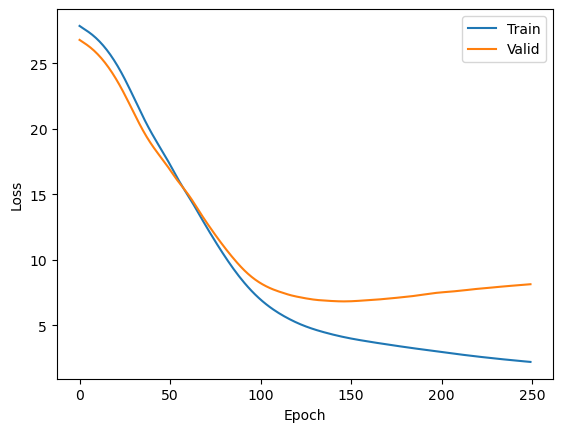

In [44]:
plt.plot(losses[:,0], label='Train')
plt.plot(losses[:,1], label='Valid')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [45]:
from sklearn.metrics import mean_absolute_percentage_error as MAPE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as R2

X_test_torch = torch.from_numpy(X_test).float().to(device)

model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_torch).numpy()

print('MAPE: ', MAPE(y_test, y_test_pred)*100)
print('MAE : ', MAE(y_test, y_test_pred))
print('R2  : ', R2(y_test, y_test_pred))

MAPE:  131.0146182670144
MAE :  1.7807388266494122
R2  :  0.6054761865989057


In [46]:
hidden_sizes = [3, 10, 20]
n_epochs = 250

params_lst = list()
valid_mape_lst = list()
models = list()

torch.manual_seed(0)

for hs in hidden_sizes:
    model = DNN(X_train.shape[1], hs, 1)
    model = model.to(device)
    
    optimizer = torch.optim.Adam(model.parameters(), lr=0.002)
    
    model_params = count_parameters(model)
    print('Hidden-size: ', hs)
    print('Model parameters: ', model_params)
    
    losses = np.zeros((n_epochs, 2))
    for epoch in tqdm(range(n_epochs)):
        model.train()
        # Forward propagation
        y_train_pred = model(X_train_torch)
        loss = loss_function(y_train_pred, y_train_torch)
        losses[epoch,0] = loss.item()

        # Backward propagation
        model.zero_grad()
        loss.backward()

        # Update of model parameters
        optimizer.step()

    # Evaluate final model in validation set
    models.append(model)
    model.eval()
    with torch.no_grad():
        y_valid_pred = model(X_valid_torch)
        mape = MAPE(y_valid_torch, y_valid_pred)*100
    params_lst.append(model_params)
    valid_mape_lst.append(mape)       

Hidden-size:  3
Model parameters:  6166


100%|█████████████████████████████████████████| 250/250 [00:17<00:00, 13.93it/s]


Hidden-size:  10
Model parameters:  20621


100%|█████████████████████████████████████████| 250/250 [00:17<00:00, 14.39it/s]


Hidden-size:  20
Model parameters:  41441


100%|█████████████████████████████████████████| 250/250 [00:20<00:00, 12.12it/s]


In [47]:
best_idx = np.argmin(valid_mape_lst)
print('Best hidden size: ', hidden_sizes[best_idx])
print('Valid MAPE', valid_mape_lst[best_idx])
best_model = models[best_idx]
best_model.eval()
with torch.no_grad():
    y_test_pred = best_model(X_test_torch).numpy()

print('MAPE: ', MAPE(y_test, y_test_pred)*100)
print('MAE : ', MAE(y_test, y_test_pred))
print('R2  : ', R2(y_test, y_test_pred))

Best hidden size:  10
Valid MAPE 101.66583061218262
MAPE:  107.5846692899454
MAE :  1.862226045748422
R2  :  0.5835543601182965
